# Fig1X : UMAP of cell type annotation 

### Author : Eulalie Liorzou 

In [1]:
# LOAD LIBRARIES
suppressPackageStartupMessages(library(Seurat)) # v5
suppressPackageStartupMessages(library(SeuratData)) # v0.2.2
suppressPackageStartupMessages(library(SeuratDisk)) # v0.0.0.9020
suppressPackageStartupMessages(library(SeuratObject)) # v4.1.3
library(dplyr)
library(data.table)
library(pheatmap)
library(ggplotify)
library(purrr)
library(ggpubr)
library(ggh4x)
library(RColorBrewer)
library(stringr)
library(edgeR) # v3.38.4
library(tidyverse)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose


Loading required package: ggplot2

Loading required package: limma

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ data.table::between() masks dplyr::between()
✖ dplyr::filter()       masks stats::filter()
✖ data.table::first()   masks dplyr::first()
✖ lubridate::hour()     masks data.table::hour()
✖ lubridate::isoweek()  masks data.table::isoweek()
✖ dp

## Macaque UMAP annotation 

In [2]:
species = "Macaque"
outdir = "../../../results/snRNA-seq/"
myseed = 1212

## Load the object 
sobj = readRDS(file = paste0(outdir,  "seuratobject/", species,"_processed.rds"))

In [3]:
## Color code 


colors_subcelltypes = c("Glandular_secretory" = "#724389",
                         "Epithelial_Luminal" = "#945BAE",
                         "Epithelial_Cycling" = "#A676BC",
                         "SOX9_functional_basal" ="#CAADD7",
                         "Epithelial_Ciliated" = "#BB78A8",
                         "eStromal" = "#5D84C7",  
                         "eStromal_cycling" = "#5D84C7", 
                         "eStromal_MMPs" = "#5D84C7", 
                         "dStromal" = "#5D84C7", 
                         "ePV" = "#5D84C7", 
                         "Endothelial" = "#F4C67B", 
                         "Immune_Lymphoid" ="#A2C284", 
                         "Immune_Myeloid" = "#A2C284"
                     )



In [4]:
options(repr.plot.width=6, repr.plot.height=6)
species = "Macaque"
colors_subcelltypes = c("Epithelial_Glandular" = "#724389",
                         "Epithelial_Ciliated" = "#BB78A8",
                         "Epithelial_Cycling" = "#A676BC",
                         "Stromal" = "#5D84C7",  
                         "Stromal_Perivascular" = "#5D84C7",  
                         "Endothelial" = "#F4C67B", 
                         "Immune" ="#A2C284", 
                         "Myometrium" = "#F98F5D"
                     )

# Manual annotation 
DimPlot(sobj, reduction = "umap",pt.size = 0.5, 
        group.by = "Manual_annotation", 
        cols = colors_subcelltypes) +NoLegend() + ggtitle(paste0(species))

ggsave(filename = paste0("../../../figures/pieces/UMAP_",species,"_celltypes_VF.pdf"), device = "pdf", width = 6, height = 6)

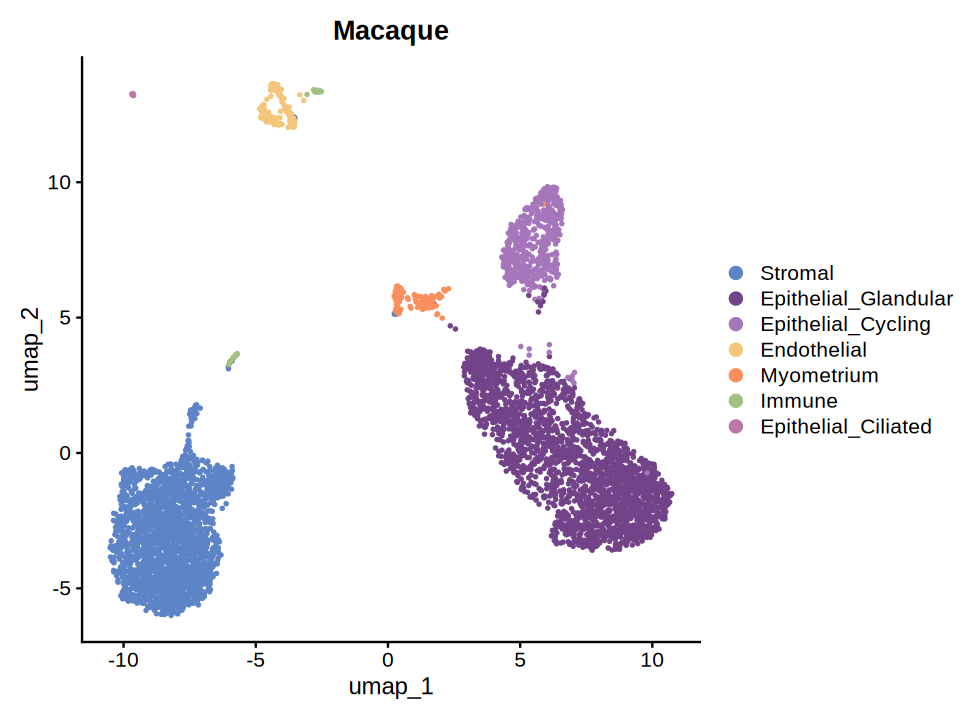

In [5]:
options(repr.plot.width=8, repr.plot.height=6)
species = "Macaque"
colors_subcelltypes = c("Epithelial_Glandular" = "#724389",
                         "Epithelial_Ciliated" = "#BB78A8",
                         "Epithelial_Cycling" = "#A676BC",
                         "Stromal" = "#5D84C7",  
                         "Stromal_Perivascular" = "#5D84C7",  
                         "Endothelial" = "#F4C67B", 
                         "Immune" ="#A2C284", 
                         "Myometrium" = "#F98F5D"
                     )

# Manual annotation 
DimPlot(sobj, reduction = "umap",pt.size = 0.5, 
        group.by = "Manual_annotation", 
        cols = colors_subcelltypes) + ggtitle(paste0(species))

ggsave(filename = paste0("../../../figures/pieces/UMAP_",species,"_celltypes_legend_VF.pdf"), device = "pdf", width = 8, height = 6)

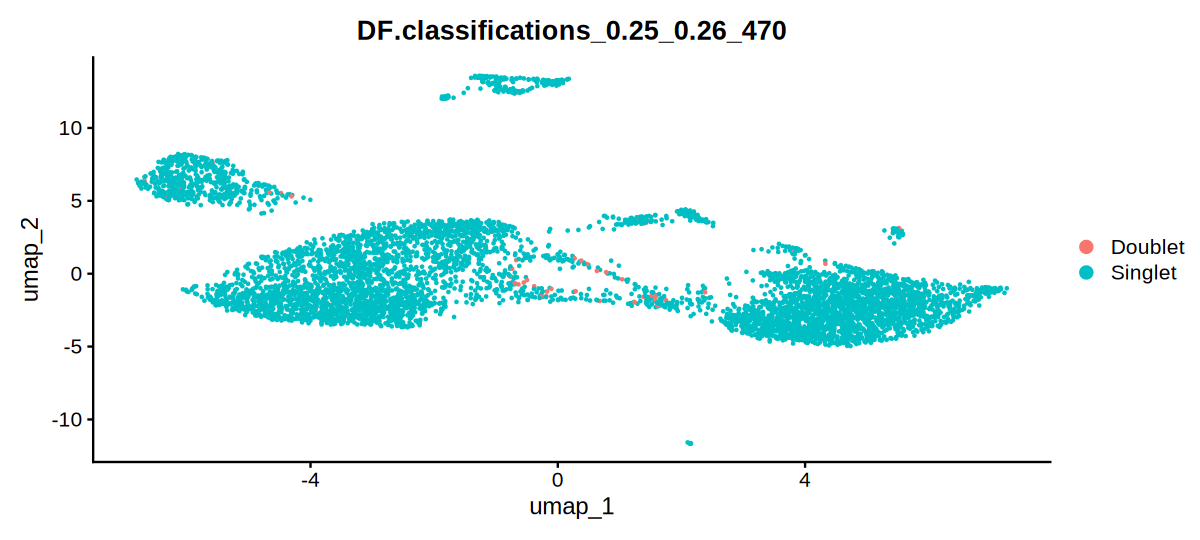

In [150]:
DimPlot(sobj, group.by = "DF.classifications_0.25_0.26_470", reduction = "umap" )

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


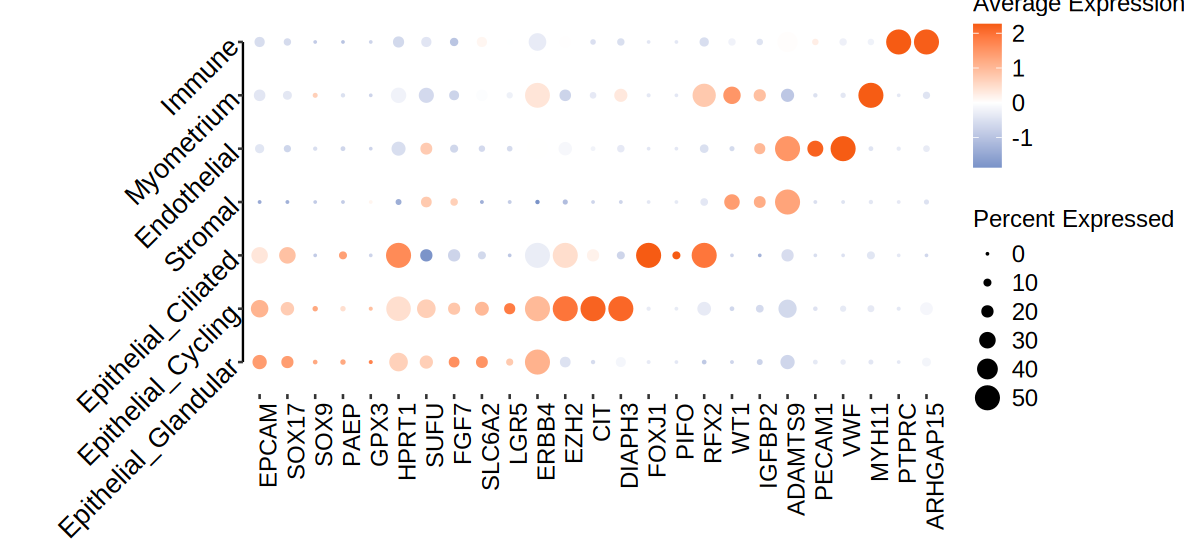

In [17]:
options(repr.plot.width=10, repr.plot.height=4.5)

## Markers per celltype

# celltype_markers = c( "EPCAM", "SOX17", # global epithelial markers 
#                      "FGF7",  "SLC6A2","ERBB4", # marker of preglandular and glandular cells in human (Garcia-Alonso paper), ERBB4 also in luminal cells 
#                      "LGR5", # marker of luminal cells in human (Garcia Alonso paper)
#                      "EZH2", "CIT", "DIAPH3", # marker of proliferation
#                      "FOXJ1", "RFX2", # markers of ciliated cells
#                      "WT1", "IGFBP2", "ADAMTS9", # markers of stromal cells 
#                      "PECAM1", "VWF", # markers of endothelial cells
#                      "MYH11", # marker of smooth muscle cells
#                      "PTPRC", "ARHGAP15") # markers of immune cells 

celltype_markers = c( "EPCAM", "SOX17", # global epithelial markers 
                     "SOX9", "PAEP", "GPX3", # markers of glandular cells in human
                      "HPRT1", "SUFU","FGF7",  "SLC6A2", # marker of preglandular (Garcia-Alonso paper), 
                     "LGR5","ERBB4", # marker of luminal cells in human (Garcia Alonso paper)
                     "EZH2", "CIT", "DIAPH3", # marker of proliferation
                     "FOXJ1", "PIFO", "RFX2", # markers of ciliated cells
                     "WT1", "IGFBP2", "ADAMTS9", # markers of stromal cells 
                     "PECAM1", "VWF", # markers of endothelial cells
                     "MYH11", # marker of smooth muscle cells
                     "PTPRC", "ARHGAP15") # markers of immune cells 

## Order the features from Manual annotation 
celltype_order = c('Epithelial_Glandular','Epithelial_Cycling','Epithelial_Ciliated','Stromal','Endothelial','Myometrium','Immune')
sobj$Manual_annotation = factor(sobj$Manual_annotation, levels= celltype_order)


## Plot the DotPlot
DotPlot(sobj,scale.max = 50,
        features =celltype_markers, 
        group.by = "Manual_annotation",
        assay ="soupx",
        scale=TRUE) +
     scale_colour_gradient2(low="#597DBC",mid = "white", high="#F65B13") +
    theme_pubr() + 
    labs(y="") +
    guides(x = "axis_truncated", y = "axis_truncated") +
    theme( 
        strip.background = element_blank(),
        axis.line.x = element_blank(),
      legend.title =element_text(size = 14) ,
        legend.text =element_text(size = 14) ,
        strip.text = element_text(size = 16,face = "bold"), 
        axis.title.y = element_text(face = "bold", size = 20),
        axis.title.x = element_blank(),
        axis.text.y = element_text(size = 16, hjust = 1, angle=45),
        axis.text.x = element_text(size = 14, hjust = 1, angle=90),
        plot.title = element_text(face = "bold", size = 20),
        legend.position = "right", 
        axis.line.y = element_line(),
       )

ggsave(filename = "../../../figures/pieces/Macaque_cell_markers.pdf", device = "pdf", width = 10, height = 4.5)

In [114]:
table(sobj$Manual_annotation)


             Stromal Epithelial_Glandular   Epithelial_Cycling 
                2256                 2915                  530 
         Endothelial           Myometrium               Immune 
                 157                  131                   46 
 Epithelial_Ciliated 
                  10 

## Mouse UMAP annotation 

In [4]:
species = "MousePseudopregnant"
outdir = "../../../results/snRNA-seq/"
myseed = 1212

## Load the object 
sobj_Mouse = readRDS(file = paste0(outdir,  "seuratobject/", species,"_processed.rds"))

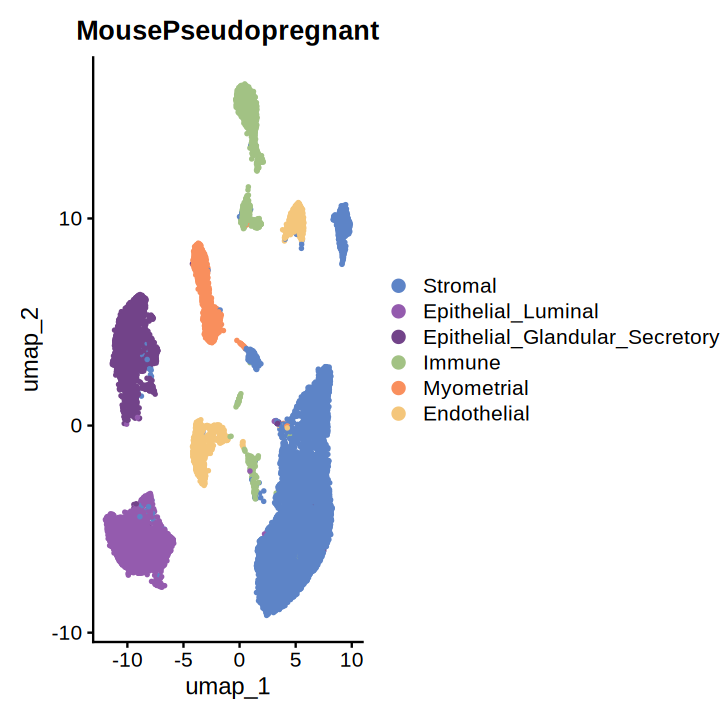

In [9]:
options(repr.plot.width=6, repr.plot.height=6)
species = "MousePseudopregnant"
## Color code 
colors_subcelltypes = c("Epithelial_Glandular_Secretory" = "#724389",
                         "Stromal" = "#5D84C7",  
                         "Epithelial_Luminal" = "#945BAE",
                         "Immune" ="#A2C284", 
                         "Endothelial" = "#F4C67B", 
                         "Myometrial" = "#F98F5D"
                     )

# Manual annotation 
DimPlot(sobj_Mouse, reduction = "umap",pt.size = 0.5, 
        group.by = "Manual_annotation", cols = colors_subcelltypes)  + ggtitle(paste0(species))
ggsave(filename = paste0("../../../figures/pieces/UMAP_",species,"_celltypes_legend_VF.pdf"), device = "pdf", width = 8, height = 6)

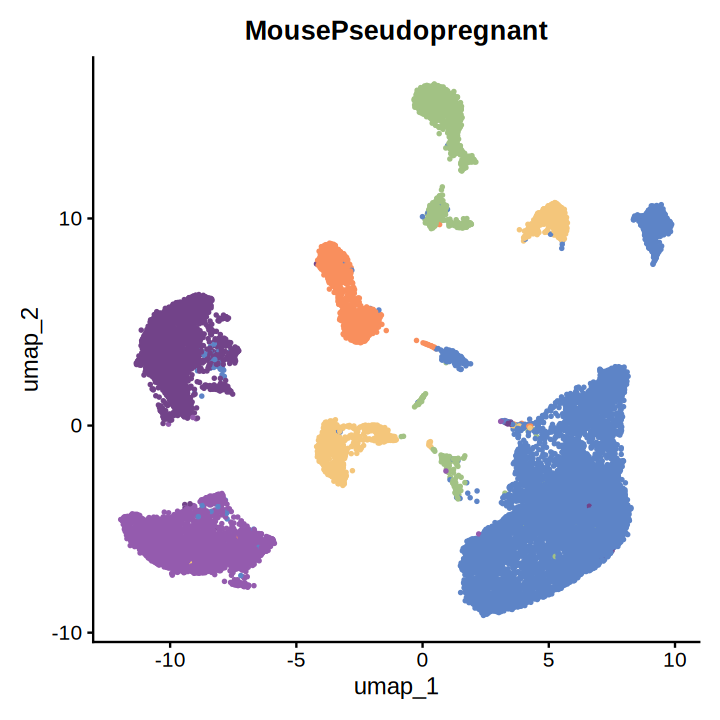

In [18]:
options(repr.plot.width=6, repr.plot.height=6)
species = "MousePseudopregnant"
## Color code 
colors_subcelltypes = c("Epithelial_Glandular_Secretory" = "#724389",
                         "Stromal" = "#5D84C7",  
                         "Epithelial_Luminal" = "#945BAE",
                         "Immune" ="#A2C284", 
                         "Endothelial" = "#F4C67B", 
                         "Myometrial" = "#F98F5D"
                     )

# Manual annotation 
DimPlot(sobj_Mouse, reduction = "umap",pt.size = 0.5, 
        group.by = "Manual_annotation", cols = colors_subcelltypes) + NoLegend() + ggtitle(paste0(species))
ggsave(filename = paste0("../../../figures/pieces/UMAP_",species,"_celltypes_VF.pdf"), device = "pdf", width = 6, height = 6)

In [133]:

table(sobj_Mouse$Manual_annotation)


                       Stromal             Epithelial_Luminal 
                         10069                           2977 
Epithelial_Glandular_Secretory                         Immune 
                          2805                           1646 
                    Myometrial                    Endothelial 
                          1444                           1610 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


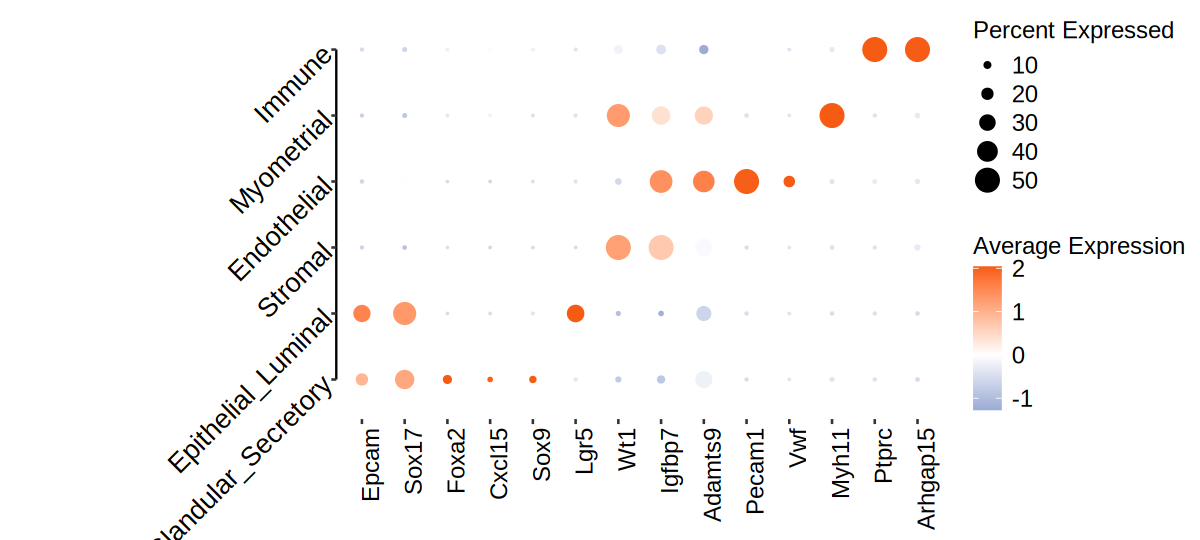

In [14]:
options(repr.plot.width=10, repr.plot.height=4.5)

## Markers per celltype

celltype_markers = c( "Epcam", "Sox17", # global epithelial markers 
                     "Foxa2","Cxcl15","Sox9", # marker of preglandular and glandular cells in mouse atlas 
                     "Lgr5", # marker of luminal cells in human (Garcia Alonso paper)
                     "Wt1", "Igfbp7", "Adamts9", # markers of stromal cells 
                     "Pecam1", "Vwf", # markers of endothelial cells
                     "Myh11", # marker of smooth muscle cells
                     "Ptprc", "Arhgap15") # markers of immune cells 

## Order the features from Manual annotation 
celltype_order = c('Epithelial_Glandular_Secretory','Epithelial_Luminal','Stromal','Endothelial','Myometrial','Immune')
sobj_Mouse$Manual_annotation = factor(sobj_Mouse$Manual_annotation, levels= celltype_order)

## Plot the DotPlot
DotPlot(sobj_Mouse,scale.max = 50,
        features =celltype_markers, 
        group.by = "Manual_annotation",
        assay ="soupx",
        scale=TRUE) +
     scale_colour_gradient2(low="#597DBC",mid = "white", high="#F65B13") +
    theme_pubr() + 
    labs(y="") +
    guides(x = "axis_truncated", y = "axis_truncated") +
    theme( 
        strip.background = element_blank(),
        axis.line.x = element_blank(),
      legend.title =element_text(size = 14) ,
        legend.text =element_text(size = 14) ,
        strip.text = element_text(size = 16,face = "bold"), 
        axis.title.y = element_text(face = "bold", size = 20),
        axis.title.x = element_blank(),
        axis.text.y = element_text(size = 16, hjust = 1, angle=45),
        axis.text.x = element_text(size = 14, hjust = 1, angle=90),
        plot.title = element_text(face = "bold", size = 20),
        legend.position = "right", 
        axis.line.y = element_line(),
       )
ggsave(filename = "../../../figures/pieces/Mouse_cell_markers.pdf", device = "pdf", width = 10, height = 4.5)

## Marmoset annotation 

In [8]:
species = "Marmoset"
outdir = "../../../results/snRNA-seq/"
myseed = 1212

## Load the object 
sobj_Marmoset = readRDS(file = paste0(outdir,  "seuratobject/", species,"_processed.rds"))

In [9]:
table(sobj_Marmoset$Manual_annotation)


Epithelial_Glandular_Secretory                        Stromal 
                          5045                           2287 
            Epithelial_Luminal                         Immune 
                          1083                            359 
                    Myometrium                    Endothelial 
                           323                            127 
            Epithelial_Cycling 
                            73 

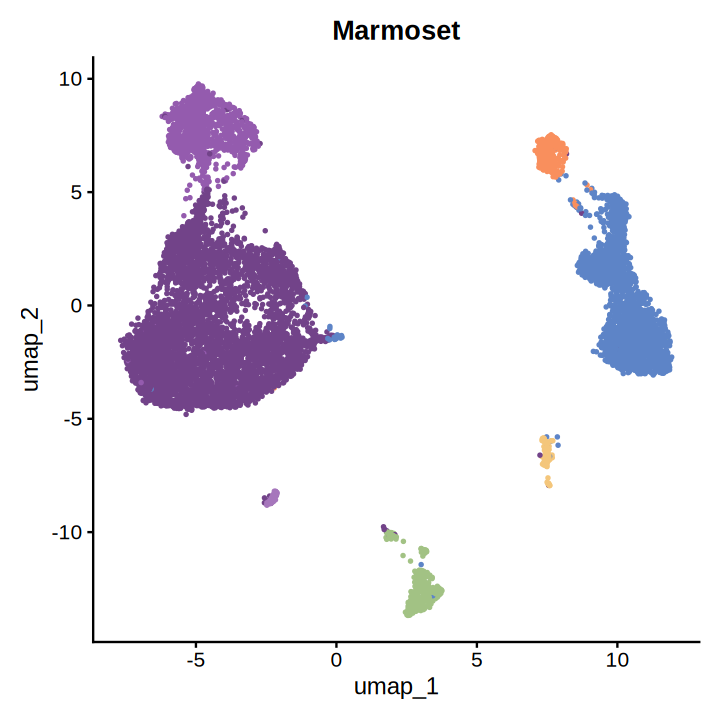

In [11]:
options(repr.plot.width=6, repr.plot.height=6)
species = "Marmoset"
# Color code 
colors_subcelltypes = c("Epithelial_Glandular_Secretory" = "#724389",
                         "Epithelial_Cycling" = "#A676BC",
                         "Stromal" = "#5D84C7",  
                         "Epithelial_Luminal" = "#945BAE",
                         "Immune" ="#A2C284", 
                         "Endothelial" = "#F4C67B", 
                         "Myometrium" = "#F98F5D"
                     )

# Manual annotation 
DimPlot(sobj_Marmoset, reduction = "umap",pt.size = 0.5, 
        group.by = "Manual_annotation", cols = colors_subcelltypes) + NoLegend() + ggtitle(paste0(species))
ggsave(filename = paste0("../../../figures/pieces/UMAP_",species,"_celltypes_VF.pdf"), device = "pdf", width = 6, height = 6)

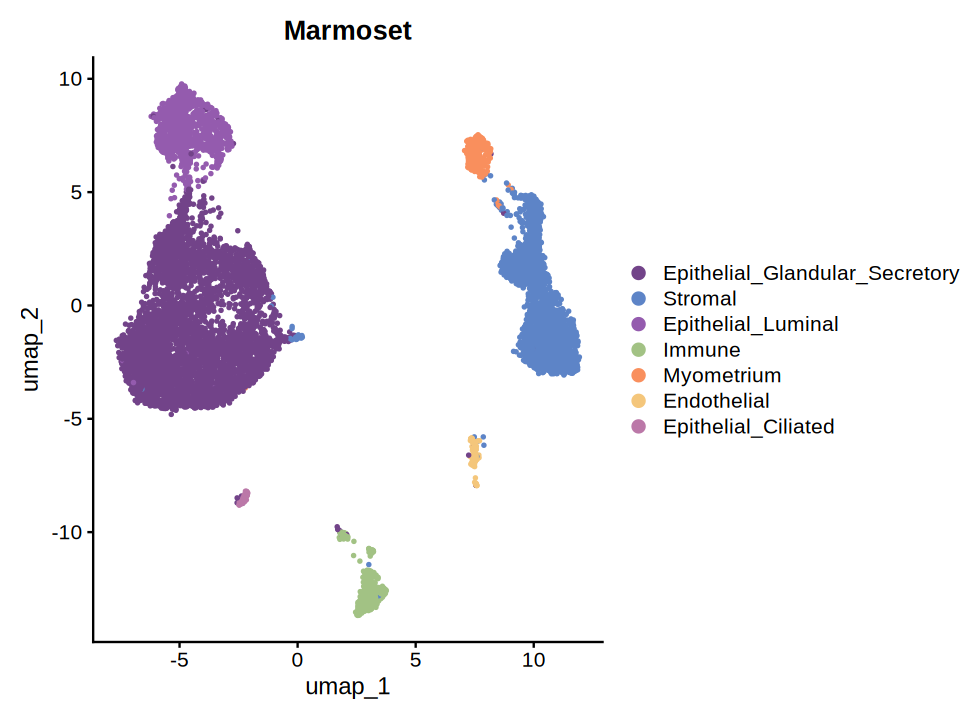

In [13]:
options(repr.plot.width=8, repr.plot.height=6)
species = "Marmoset"
# Color code 
colors_subcelltypes = c("Epithelial_Glandular_Secretory" = "#724389",
                         "Epithelial_Ciliated" = "#BB78A8",
                         "Stromal" = "#5D84C7",  
                         "Epithelial_Luminal" = "#945BAE",
                         "Immune" ="#A2C284", 
                         "Endothelial" = "#F4C67B", 
                         "Myometrium" = "#F98F5D"
                     )

# Manual annotation 
DimPlot(sobj_Marmoset, reduction = "umap",pt.size = 0.5, 
        group.by = "Manual_annotation", cols = colors_subcelltypes) + ggtitle(paste0(species))
# ggsave(filename = paste0("../../../figures/pieces/UMAP_",species,"_celltypes_legend_VF.pdf"), device = "pdf", width = 8, height = 6)

In [217]:
table(sobj_Marmoset$Manual_annotation)


Epithelial_Glandular_Secretory                        Stromal 
                          5045                           2287 
            Epithelial_Luminal                         Immune 
                          1083                            359 
                    Myometrium                    Endothelial 
                           323                            127 
           Epithelial_Ciliated 
                            73 

Warning message:
“The following requested variables were not found: PAEP”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


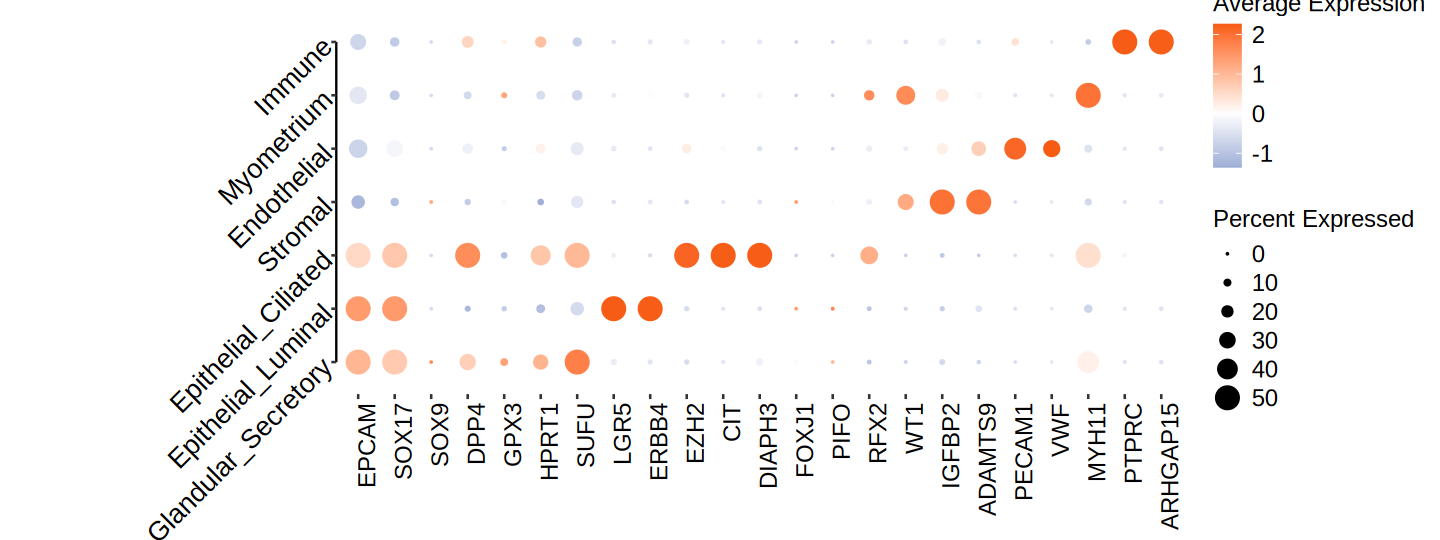

In [13]:
options(repr.plot.width=12, repr.plot.height=4.5)

## Markers per celltype
celltype_markers = c( "EPCAM", "SOX17", # global epithelial markers 
                     "SOX9", "PAEP", "DPP4","GPX3", # markers of glandular cells in human
                      "HPRT1", "SUFU", # marker of preglandular (Garcia-Alonso paper), 
                     "LGR5","ERBB4", # marker of luminal cells in human (Garcia Alonso paper)
                     "EZH2", "CIT", "DIAPH3", # marker of proliferation
                     "FOXJ1", "PIFO", "RFX2", # markers of ciliated cells
                     "WT1", "IGFBP2", "ADAMTS9", # markers of stromal cells 
                     "PECAM1", "VWF", # markers of endothelial cells
                     "MYH11", # marker of smooth muscle cells
                     "PTPRC", "ARHGAP15") # markers of immune cells 


## Order the features from Manual annotation 
celltype_order = c('Epithelial_Glandular_Secretory','Epithelial_Luminal','Epithelial_Ciliated','Stromal','Endothelial','Myometrium','Immune')
sobj_Marmoset$Manual_annotation = factor(sobj_Marmoset$Manual_annotation, levels= celltype_order)

## Plot the DotPlot
DotPlot(sobj_Marmoset,scale.max = 50,
        features =celltype_markers, 
        group.by = "Manual_annotation",
        assay ="soupx",
        scale=TRUE) +
     scale_colour_gradient2(low="#597DBC",mid = "white", high="#F65B13") +
    theme_pubr() + 
    labs(y="") +
    guides(x = "axis_truncated", y = "axis_truncated") +
    theme( 
        strip.background = element_blank(),
        axis.line.x = element_blank(),
      legend.title =element_text(size = 14) ,
        legend.text =element_text(size = 14) ,
        strip.text = element_text(size = 16,face = "bold"), 
        axis.title.y = element_text(face = "bold", size = 20),
        axis.title.x = element_blank(),
        axis.text.y = element_text(size = 16, hjust = 1, angle=45),
        axis.text.x = element_text(size = 14, hjust = 1, angle=90),
        plot.title = element_text(face = "bold", size = 20),
        legend.position = "right", 
        axis.line.y = element_line(),
       )
ggsave(filename = "../../../figures/pieces/Marmoset_cell_markers.pdf", device = "pdf", width = 12, height = 4.5)

## Human cell type re-annotation by consensus

In [6]:
species = "Human"
outdir = "../../../results/snRNA-seq/"
myseed = 1212

## Load the object 
sobj_Human = readRDS(file = paste0(outdir,  "seuratobject/", species,"_processed.rds"))

In [15]:
options(repr.plot.width=6, repr.plot.height=6)
species = "Human"
# Color code 
colors_subcelltypes = c("Glandular_secretory" = "#724389",
                         "Epithelial_Luminal" = "#945BAE",
                         "Epithelial_Cycling" = "#A676BC",
                         "SOX9_functional_basal" ="#CAADD7",
                         "Epithelial_Ciliated" = "#BB78A8",
                         "eStromal" = "#5D84C7",  
                         "eStromal_cycling" = "#5D84C7", 
                         "eStromal_MMPs" = "#5D84C7", 
                         "dStromal" = "#5D84C7", 
                         "ePV" = "#5D84C7", 
                         "Endothelial" = "#F4C67B", 
                         "Immune_Lymphoid" ="#A2C284", 
                         "Immune_Myeloid" = "#A2C284"
                     )

colors_subcelltypes = c("Epithelial_Glandular_Secretory" = "#724389",
                         "Epithelial_Ciliated" = "#BB78A8",
                         "Epithelial_Precursors" ="#CAADD7",
                         "Stromal" = "#5D84C7",  
                         "Epithelial_Luminal" = "#945BAE",
                         "Myeloid" ="#A2C284", 
                         "Lymphoid" ="#A2C284", 
                         "Endothelial" = "#F4C67B", 
                         "Myometrium" = "#F98F5D"
                     )

# Manual annotation 
DimPlot(sobj_Human, reduction = "umap_harmony",pt.size = 0.5, 
        group.by = "Manual_annotation", cols=colors_subcelltypes) + NoLegend() + ggtitle(paste0(species))

ggsave(filename = paste0("../../../figures/pieces/UMAP_",species,"_celltypes_VF.pdf"), device = "pdf", width = 6, height = 6)

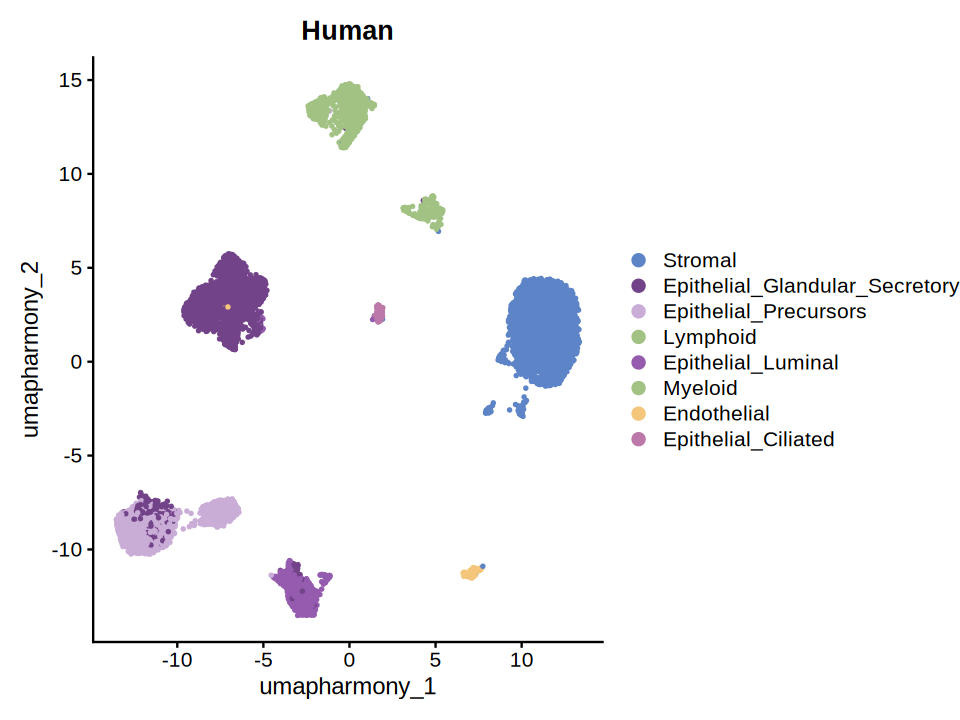

In [16]:
options(repr.plot.width=8, repr.plot.height=6)
species = "Human"
# Color code 
colors_subcelltypes = c("Glandular_secretory" = "#724389",
                         "Epithelial_Luminal" = "#945BAE",
                         "Epithelial_Cycling" = "#A676BC",
                         "SOX9_functional_basal" ="#CAADD7",
                         "Epithelial_Ciliated" = "#BB78A8",
                         "eStromal" = "#5D84C7",  
                         "eStromal_cycling" = "#5D84C7", 
                         "eStromal_MMPs" = "#5D84C7", 
                         "dStromal" = "#5D84C7", 
                         "ePV" = "#5D84C7", 
                         "Endothelial" = "#F4C67B", 
                         "Immune_Lymphoid" ="#A2C284", 
                         "Immune_Myeloid" = "#A2C284"
                     )

colors_subcelltypes = c("Epithelial_Glandular_Secretory" = "#724389",
                         "Epithelial_Ciliated" = "#BB78A8",
                         "Epithelial_Precursors" ="#CAADD7",
                         "Stromal" = "#5D84C7",  
                         "Epithelial_Luminal" = "#945BAE",
                         "Myeloid" ="#A2C284", 
                         "Lymphoid" ="#A2C284", 
                         "Endothelial" = "#F4C67B", 
                         "Myometrium" = "#F98F5D"
                     )

# Manual annotation 
DimPlot(sobj_Human, reduction = "umap_harmony",pt.size = 0.5, 
        group.by = "Manual_annotation", cols=colors_subcelltypes) + ggtitle(paste0(species))

ggsave(filename = paste0("../../../figures/pieces/UMAP_",species,"_celltypes_legend_VF.pdf"), device = "pdf", width = 8, height = 6)

In [205]:
sobj_Human = JoinLayers(sobj_Human)

In [209]:
table(sobj_Human$Manual_annotation)


Epithelial_Glandular_Secretory          Epithelial_Precursors 
                          2265                           1454 
            Epithelial_Luminal            Epithelial_Ciliated 
                           683                             92 
                       Stromal                    Endothelial 
                          2929                            119 
                       Myeloid                       Lymphoid 
                           239                            864 
                         MUC5B 
                             0 

In [14]:
options(repr.plot.width=12, repr.plot.height=4.5)

## Markers per celltype
celltype_markers = c( "EPCAM", "SOX17", # global epithelial markers 
                     "SOX9", "PAEP", "DPP4","GPX3", # markers of glandular cells in human
                      "HPRT1", "SUFU", # marker of preglandular (Garcia-Alonso paper), 
                     "LGR5","ERBB4", # marker of luminal cells in human (Garcia Alonso paper)
                     "EZH2", "CIT", "DIAPH3", # marker of proliferation
                     "FOXJ1", "PIFO", "RFX2", # markers of ciliated cells
                     "WT1", "IGFBP2", "ADAMTS9", # markers of stromal cells 
                     "PECAM1", "VWF", # markers of endothelial cells
                     "MYH11", # marker of smooth muscle cells
                     "PTPRC", "ARHGAP15") # markers of immune cells 


## Order the features from Manual annotation 
celltype_order = c('Epithelial_Glandular_Secretory',"Epithelial_Precursors",'Epithelial_Luminal','Epithelial_Ciliated','Stromal','Endothelial','Myeloid','Lymphoid')
sobj_Human$Manual_annotation = factor(sobj_Human$Manual_annotation, levels= celltype_order)

## Set idents to Manual annotation 
Idents(sobj_Human) = sobj_Human$Manual_annotation

## Plot the DotPlot
DotPlot(sobj_Human, features =celltype_markers, group.by = "Manual_annotation",scale=TRUE, scale.max = 50,assay = "RNA") +
     scale_colour_gradient2(low="#597DBC",mid = "white", high="#F65B13") +
    theme_pubr() + 
    labs(y="") +
    guides(x = "axis_truncated", y = "axis_truncated") +
    theme( 
        strip.background = element_blank(),
        axis.line.x = element_blank(),
      legend.title =element_text(size = 14) ,
        legend.text =element_text(size = 14) ,
        strip.text = element_text(size = 16,face = "bold"), 
        axis.title.y = element_text(face = "bold", size = 20),
        axis.title.x = element_blank(),
        axis.text.y = element_text(size = 16, hjust = 1, angle=45),
        axis.text.x = element_text(size = 14, hjust = 1, angle=90),
        plot.title = element_text(face = "bold", size = 20),
        legend.position = "right", 
        axis.line.y = element_line(),
       )
ggsave(filename = "../../../figures/pieces/Human_cell_markers.pdf", device = "pdf", width = 12, height = 4.5)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [12]:
sessionInfo()

R version 4.3.0 (2023-04-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.8 (Ootpa)

Matrix products: default
BLAS/LAPACK: /opt/gensoft/lib/OpenBLAS/0.3.21/lib/libopenblas_zenp-r0.3.21.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Paris
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.3       forcats_1.0.0         readr_2.1.5          
 [4] tidyr_1.3.1           tibble_3.2.1          tidyverse_2.0.0      
 [7] edgeR_4.0.16          limma_3.58.1          stringr_1.5.1      